In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#####Read the 1st round IDEAS result#########
statetable = pandas.read_table('/Users/linan/Downloads/run_IDEAS_vision_1.state', sep = ' ')

In [7]:
#####Specify the celltypes in the analysis, need to use the one with all marks available#####
celltypelist = ['NEU','G1E', 'ER4', 'B_SPL', 'ERY_fl']
marklist = ['atac','ctcf','h3k27ac','h3k27me3','h3k36me3','h3k4me1','h3k4me3','h3k9me3']
suffix = 'pkn2_16.txt'

In [8]:
####Read the signal file from each cell type and each mark, then calculate the variance and mean signal for each mark in each state of each cell type####
####Input: State file, signal file####
####Output: a table of all signals in the region covered by defined state, varliance of signal in that state, mean of signal in that state####
def Signal_for_celltype (celltype):
    bwtable = pandas.DataFrame()

    for i in marklist:
        bwtable[celltype+'.'+i] = pandas.read_table('/Users/linan/Downloads/'+celltype+'.'+i+'.'+suffix, header=None).values.flatten()

    nstate = statetable[celltype].max()

    varlist = np.zeros((nstate+1,len(marklist)))
    meanlist = np.zeros((nstate+1,len(marklist)))

    for i in range(0, nstate+1):
        bwstate = bwtable.loc[statetable[celltype]==i,:]
        varlist[i] = bwstate.var()
        meanlist[i] = bwstate.mean()
    return (bwtable, varlist, meanlist)

In [9]:
#####apply the defined function for all the cell types in this analysis####
bwall = []
varall = []
meanall = []
for c in celltypelist:
    cbw, cvar, cmean = Signal_for_celltype(c)
    bwall.append(cbw)
    varall.append(cvar)
    meanall.append(cmean)

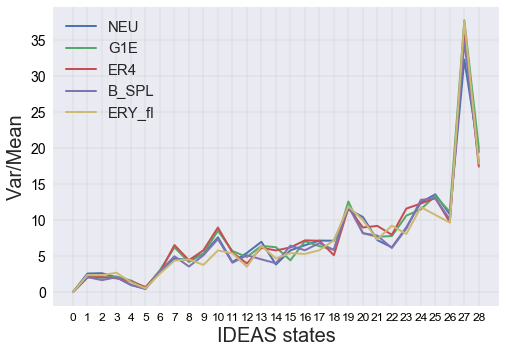

In [13]:
####Plot the var/mean ratio for each state in each cell type, the state with highest var/mean ratio is more likely to be heterogenous###
plt.figure(6)
fig,ax = plt.subplots(1)
for i in range(0,len(celltypelist)):
    ax.plot(np.sum(varall[i]/meanall[i], axis=1),label=celltypelist[i],linewidth=2)
ax.legend(loc="best",prop={'size': 15})
plt.ylabel('Var/Mean', size = 20)
plt.xlabel('IDEAS states', size = 20)
plt.yticks(color='k',size=14)
plt.xticks(xrange(0,statetable[celltypelist[i]].max()+1),color='k',size=12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig("/Users/linan/Desktop/varmean.png", dpi=150, transparent=True)
plt.show()

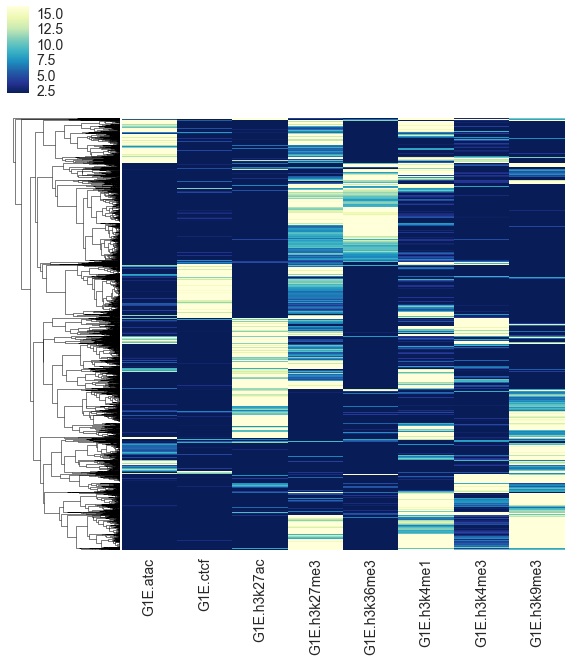

In [16]:
######plot the signal in regions covered by the heterogenous state in one celltype#####
###### 1 corresponds to the G1E cell type in previous defined list###
statenum = 27
sns.set(font_scale=1.4)
g = sns.clustermap(bwall[1].loc[statetable[celltypelist[1]]==statenum,:],col_cluster=False,cmap='YlGnBu_r',yticklabels=False)
plt.savefig("/Users/linan/Desktop/G1Estate27.png", dpi=150, transparent=True, bbox_inches = 'tight')
plt.show()